In [1]:
pwd

'/mnt/workspace/sunqiao/OpenPCDet/tools/MLE'

# 读取数据

In [2]:
import pandas as pd
import numpy as np
# data = pd.read_excel('I-V_data_30min_AAO_5min second etch_15min_Pb_ED_3h_180C_MAI_200nm_Ag_memory_6V.xlsx')



    # df = pd.read_excel('I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V_2.xlsx') #0.55
    # df = pd.read_excel('I-V_data_30min_AAO_5min second etch_15min_Pb_ED_3h_180C_MAI_200nm_Ag_memory_6V.xlsx') #0.33
    # df = pd.read_excel('I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx') #0.14
    
    
# data = pd.read_excel('../hardware_noise/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V.xlsx') #0.14
# data = pd.read_excel('../hardware_noise/I-V_data_30min_AAO_5min second etch_15min_Pb_ED_3h_180C_MAI_200nm_Ag_memory_6V.xlsx') #0.33
data = pd.read_excel('../hardware_noise/I-V_data_25min_AAO_10min_Pb_ED_1h_180C_MAI_memory_8V_2.xlsx', engine='openpyxl') #0.55


In [3]:
data.columns

Index(['voltage', 'current_cycle1', 'current_cycle2', 'current_cycle3',
       'current_cycle4', 'current_cycle5', 'current_cycle6', 'current_cycle7',
       'current_cycle8', 'current_cycle9', 'current_cycle10',
       'current_cycle11'],
      dtype='object')

In [4]:
data

,voltage,current_cycle1,current_cycle2,current_cycle3,current_cycle4,current_cycle5,current_cycle6,current_cycle7,current_cycle8,current_cycle9,current_cycle10,current_cycle11
0,0.0,8.199700e-10,1.862643e-07,1.019886e-07,3.165176e-07,1.938595e-07,1.650216e-08,2.397635e-07,4.993587e-07,3.241142e-07,4.551608e-07,7.097827e-08
1,0.1,4.091893e-08,4.159178e-05,1.908209e-05,6.240630e-05,5.789698e-05,7.073933e-08,4.492738e-05,7.239819e-05,5.942373e-05,4.860291e-05,2.018215e-05
2,0.2,2.564771e-05,2.537938e-04,3.847867e-05,1.415855e-04,8.550060e-06,3.678666e-05,8.942200e-05,1.310099e-04,1.019129e-04,8.690113e-05,2.438329e-04
3,0.3,5.614296e-04,3.618512e-04,4.274177e-04,3.241998e-04,4.836029e-05,6.713507e-04,8.829214e-04,2.166431e-04,3.379858e-04,5.497976e-04,4.440320e-04
4,0.4,1.206093e-03,1.861174e-03,2.171101e-03,1.268287e-03,1.116826e-03,8.702506e-04,1.726659e-03,1.265513e-03,1.591321e-03,8.661542e-04,1.673192e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
319,-0.4,3.955089e-04,3.030502e-04,3.724471e-04,4.463274e-04,2.275040e-04,4.780962e-04,3.054267e-04,4.793536e-04,3.325140e-04,6.270512e-04,NaN
320,-0.3,4.358107e-04,2.144209e-04,3.464018e-04,2.839921e-04,5.559864e-05,2.854121e-04,1.299074e-04,5.711678e-04,4.866660e-04,4.322909e-04,NaN
321,-0.2,3.007318e-04,1.198550e-04,2.635560e-04,1.813183e-04,3.232654e-05,1.583603e-04,2.039209e-04,2.993979e-04,2.850133e-04,2.641919e-04,NaN
322,-0.1,1.170390e-04,5.701051e-05,1.282861e-04,7.494765e-05,1.220139e-05,7.440791e-05,8.959109e-05,1.116415e-04,1.084824e-04,1.155947e-04,NaN


# 截取前 100 行

In [5]:
data = data.iloc[:100, :]

In [6]:
from matplotlib import pyplot as plt

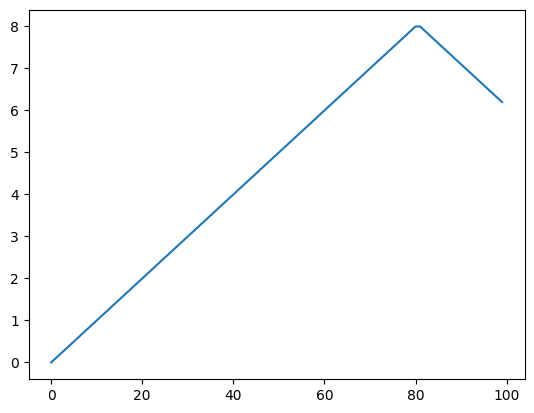

In [7]:
plt.plot(data['voltage'])

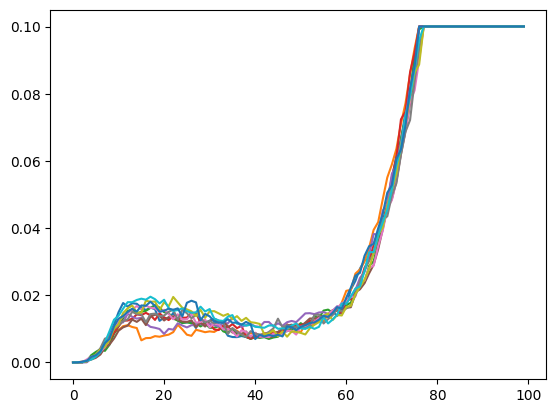

In [8]:
plt.plot(data.drop(['voltage'], axis=1))
plt.show()

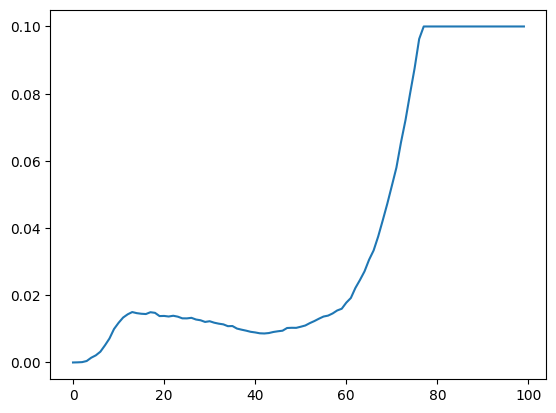

In [9]:
plt.plot(data.drop(['voltage'], axis=1).mean(axis=1))

# 计算电导

In [10]:
conductance = data.drop(['voltage'], axis=1).div(data['voltage'], axis=0)

In [11]:
conductance

,current_cycle1,current_cycle2,current_cycle3,current_cycle4,current_cycle5,current_cycle6,current_cycle7,current_cycle8,current_cycle9,current_cycle10,current_cycle11
0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,4.091893e-07,0.000416,0.000191,0.000624,0.000579,7.073933e-07,0.000449,0.000724,0.000594,0.000486,0.000202
2,1.282386e-04,0.001269,0.000192,0.000708,0.000043,1.839333e-04,0.000447,0.000655,0.000510,0.000435,0.001219
3,1.871432e-03,0.001206,0.001425,0.001081,0.000161,2.237836e-03,0.002943,0.000722,0.001127,0.001833,0.001480
4,3.015232e-03,0.004653,0.005428,0.003171,0.002792,2.175626e-03,0.004317,0.003164,0.003978,0.002165,0.004183
...,...,...,...,...,...,...,...,...,...,...,...
95,1.515242e-02,0.015152,0.015152,0.015152,0.015152,1.515239e-02,0.015152,0.015152,0.015152,0.015152,0.015152
96,1.538550e-02,0.015385,0.015385,0.015385,0.015385,1.538551e-02,0.015386,0.015386,0.015385,0.015385,0.015386
97,1.562589e-02,0.015626,0.015626,0.015626,0.015626,1.562590e-02,0.015626,0.015626,0.015626,0.015626,0.015626
98,1.587394e-02,0.015874,0.015874,0.015874,0.015874,1.587394e-02,0.015874,0.015874,0.015874,0.015874,0.015874


## 这里需要消除无穷大和空值

In [12]:
np.isinf(conductance).values.sum()

11

In [13]:
conductance = conductance[(conductance!=np.inf).all(axis=1)]
conductance

,current_cycle1,current_cycle2,current_cycle3,current_cycle4,current_cycle5,current_cycle6,current_cycle7,current_cycle8,current_cycle9,current_cycle10,current_cycle11
1,4.091893e-07,0.000416,0.000191,0.000624,0.000579,7.073933e-07,0.000449,0.000724,0.000594,0.000486,0.000202
2,1.282386e-04,0.001269,0.000192,0.000708,0.000043,1.839333e-04,0.000447,0.000655,0.000510,0.000435,0.001219
3,1.871432e-03,0.001206,0.001425,0.001081,0.000161,2.237836e-03,0.002943,0.000722,0.001127,0.001833,0.001480
4,3.015232e-03,0.004653,0.005428,0.003171,0.002792,2.175626e-03,0.004317,0.003164,0.003978,0.002165,0.004183
5,4.214602e-03,0.005335,0.006282,0.003236,0.003561,2.767029e-03,0.003987,0.004685,0.004707,0.003446,0.004346
...,...,...,...,...,...,...,...,...,...,...,...
95,1.515242e-02,0.015152,0.015152,0.015152,0.015152,1.515239e-02,0.015152,0.015152,0.015152,0.015152,0.015152
96,1.538550e-02,0.015385,0.015385,0.015385,0.015385,1.538551e-02,0.015386,0.015386,0.015385,0.015385,0.015386
97,1.562589e-02,0.015626,0.015626,0.015626,0.015626,1.562590e-02,0.015626,0.015626,0.015626,0.015626,0.015626
98,1.587394e-02,0.015874,0.015874,0.015874,0.015874,1.587394e-02,0.015874,0.015874,0.015874,0.015874,0.015874


## 每行除以该行的均值，得到用于参数估计的样本

In [14]:
conductance.div(conductance.mean(axis=1), axis=0)

,current_cycle1,current_cycle2,current_cycle3,current_cycle4,current_cycle5,current_cycle6,current_cycle7,current_cycle8,current_cycle9,current_cycle10,current_cycle11
1,0.001055,1.072397,0.492010,1.609077,1.492809,0.001824,1.158402,1.866706,1.532174,1.253172,0.520374
2,0.243648,2.410985,0.365539,1.345031,0.081224,0.349465,0.849490,1.244566,0.968151,0.825542,2.316360
3,1.279681,0.824777,0.974224,0.738957,0.110229,1.530227,2.012465,0.493800,0.770380,1.253168,1.012093
4,0.849548,1.310974,1.529280,0.893356,0.786670,0.612987,1.216224,0.891402,1.120895,0.610102,1.178563
5,0.995607,1.260173,1.483947,0.764336,0.841314,0.653650,0.941807,1.106647,1.111867,0.813970,1.026683
...,...,...,...,...,...,...,...,...,...,...,...
95,1.000001,0.999999,1.000003,1.000002,1.000000,1.000000,0.999999,1.000000,0.999999,0.999998,1.000000
96,1.000001,1.000001,1.000000,0.999994,1.000000,1.000001,1.000002,1.000001,1.000000,1.000000,1.000001
97,1.000000,1.000000,0.999999,0.999998,1.000000,1.000001,1.000002,0.999999,0.999999,1.000001,1.000001
98,1.000000,1.000003,0.999999,1.000003,0.999999,1.000000,0.999999,0.999999,1.000000,0.999999,1.000000


## 检查是否有负值

In [15]:
conductance.div(conductance.mean(axis=1), axis=0)[(conductance.div(conductance.mean(axis=1), axis=0)<0).all(axis=1)]

,current_cycle1,current_cycle2,current_cycle3,current_cycle4,current_cycle5,current_cycle6,current_cycle7,current_cycle8,current_cycle9,current_cycle10,current_cycle11


In [16]:
(conductance.div(conductance.mean(axis=1), axis=0)<0).all(axis=0)

current_cycle1     False
current_cycle2     False
current_cycle3     False
current_cycle4     False
current_cycle5     False
current_cycle6     False
current_cycle7     False
current_cycle8     False
current_cycle9     False
current_cycle10    False
current_cycle11    False
dtype: bool

# 可视化

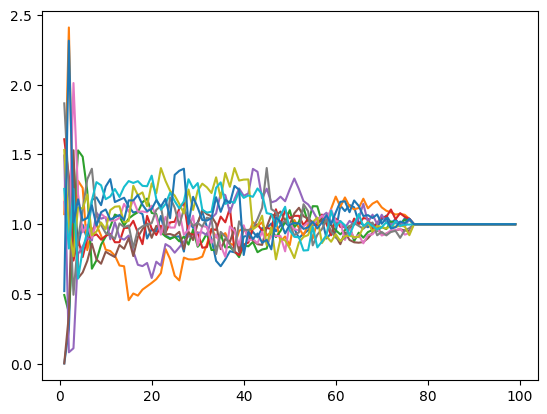

In [17]:
plt.plot(conductance.div(conductance.mean(axis=1), axis=0))
plt.show()

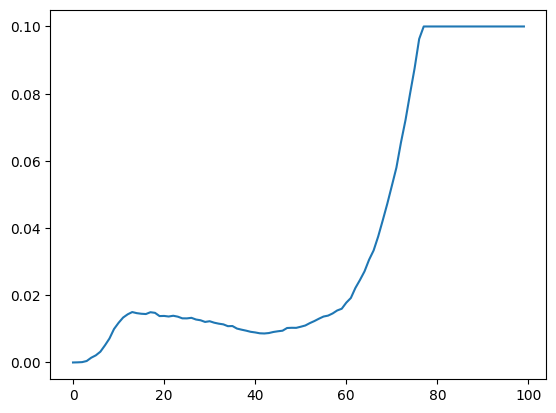

In [18]:
plt.plot(data.drop(['voltage'], axis=1).mean(axis=1))

# 用最大似然估计（MLE）估计参数 $\mu$ 和 $\sigma$

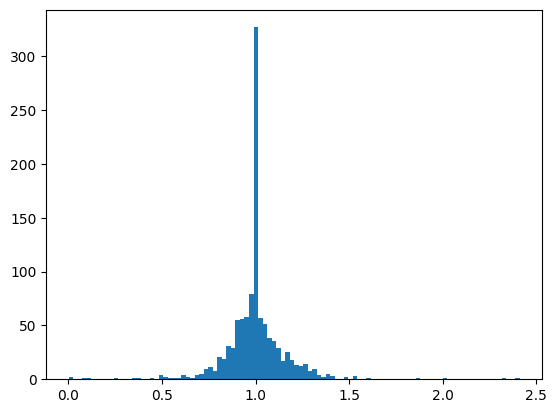

(1.0, 0.16652900503737503)
(0, 1.013771132711293)


In [19]:
from scipy.stats import norm
import matplotlib.pyplot as plt

conductance_by_mean = np.array(conductance.div(conductance.mean(axis=1), axis=0)).reshape(1, -1)[0]
samples = np.log(conductance_by_mean)
samples_fine = np.delete(conductance_by_mean, np.isfinite(samples)==False)
plt.hist(samples_fine, bins=100)  # 直方图显示
plt.show()
print(norm.fit(samples_fine))  # 返回极大似然估计
print(norm.fit(samples_fine, floc=0))  # 返回极大似然估计

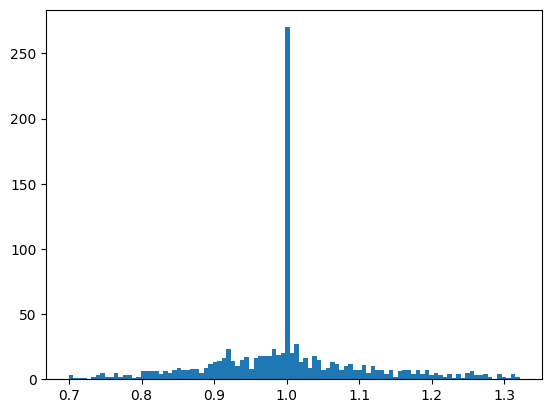

(1.0001829956165393, 0.10820954682053549)
(0, 1.0060195478933696)


In [20]:
samples_fine.sort()
percentile = 20
len_smps = len(samples_fine)
start_indx = int(len_smps/percentile/2)
end_indx = len_smps - start_indx
samples20cut = samples_fine[start_indx: end_indx]
plt.hist(samples20cut, bins=100)  # 直方图显示
plt.show()
print(norm.fit(samples20cut)) 
print(norm.fit(samples20cut, floc=0))  # 返回极大似然估计